In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.animation import FuncAnimation, PillowWriter

import numpy as np

## 1. Create visualization of the populations in the case of rare disease within the population.

Visualization saved!

Key numbers:
  Population: 10,000
  People with disease: 100 (1%)
  People without disease: 9,900 (99%)

Test results:
  True positives: 99
  False positives: 99
  Total positives: 198

Probability of having disease if you test positive: 50.0%


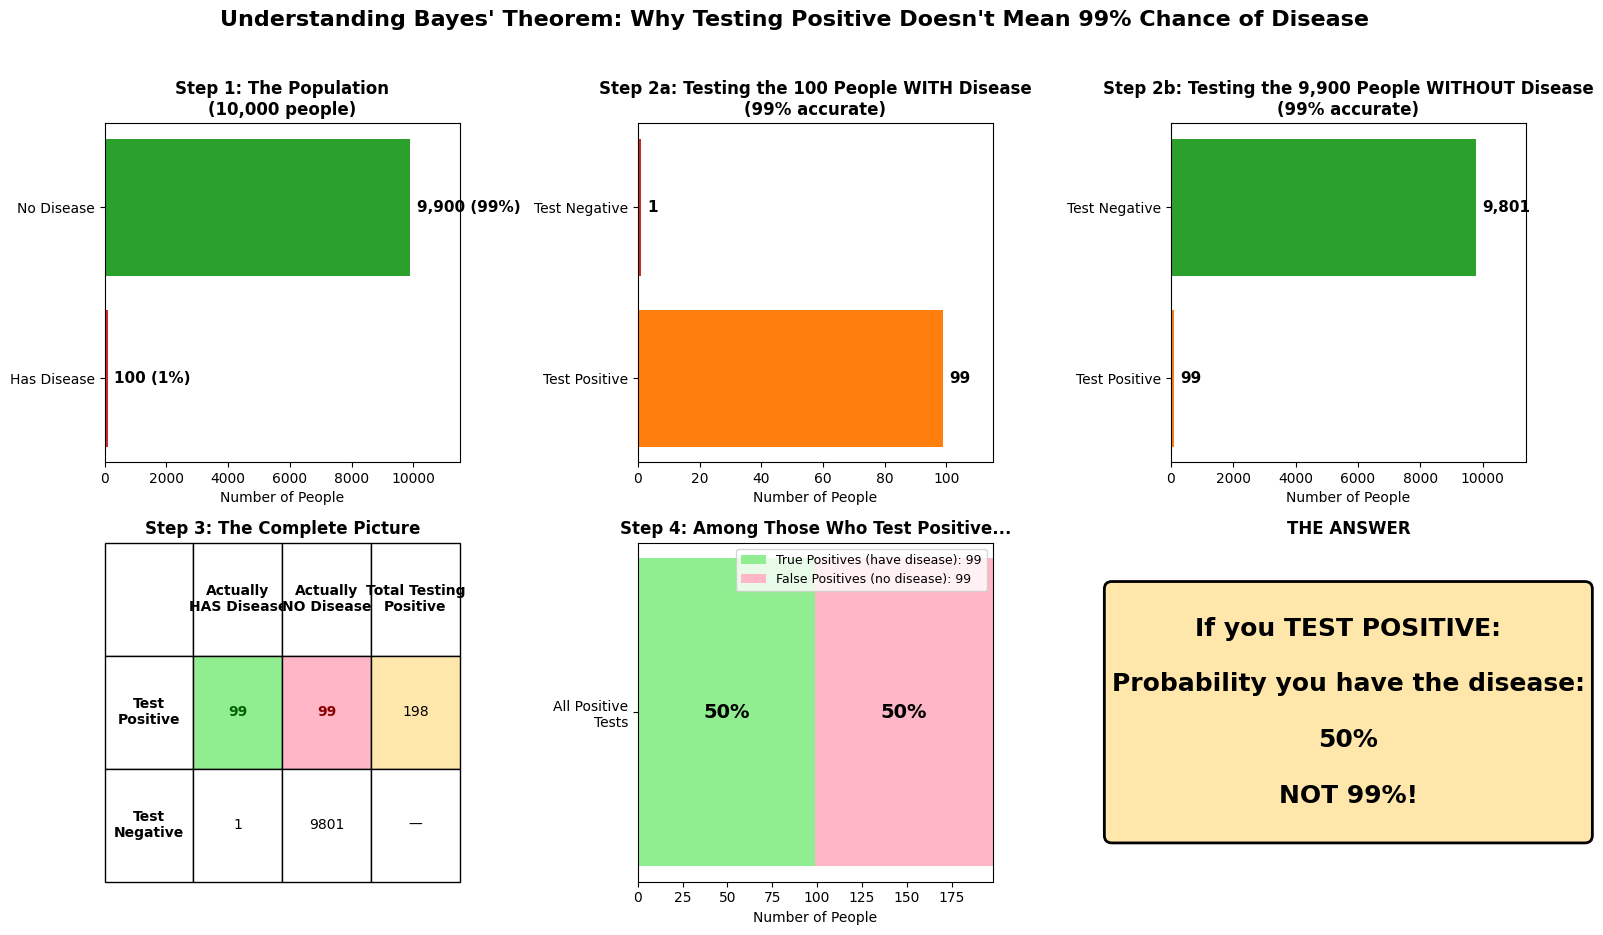

In [12]:
# Set up the problem parameters
population_size = 10000
disease_rate = 0.01
sensitivity = 0.99  # P(Positive | Disease)
false_positive_rate = 0.01  # P(Positive | No Disease)

# Calculate the numbers
people_with_disease = int(population_size * disease_rate)
people_without_disease = population_size - people_with_disease

true_positives = int(people_with_disease * sensitivity)
false_negatives = people_with_disease - true_positives

false_positives = int(people_without_disease * false_positive_rate)
true_negatives = people_without_disease - false_positives

total_positives = true_positives + false_positives

# Create the visualization
fig = plt.figure(figsize=(16, 10))
fig.suptitle('Understanding Bayes\' Theorem: Why Testing Positive Doesn\'t Mean 99% Chance of Disease', 
             fontsize=16, fontweight='bold', y=0.98)

# Panel 1: Population breakdown
ax1 = plt.subplot(2, 3, 1)
ax1.set_title('Step 1: The Population\n(10,000 people)', fontsize=12, fontweight='bold')
bars1 = ax1.barh(['Has Disease', 'No Disease'], 
                 [people_with_disease, people_without_disease],
                 color=['#d62728', '#2ca02c'])
ax1.set_xlabel('Number of People')
# Add labels on top of bars
for i, (bar, value) in enumerate(zip(bars1, [people_with_disease, people_without_disease])):
    width = bar.get_width()
    ax1.text(width + population_size*0.02, bar.get_y() + bar.get_height()/2, 
             f'{value:,} ({value/population_size*100:.0f}%)', 
             ha='left', va='center', fontsize=11, fontweight='bold')
ax1.set_xlim(0, population_size * 1.15)

# Panel 2: Test results for people WITH disease
ax2 = plt.subplot(2, 3, 2)
ax2.set_title(f'Step 2a: Testing the {people_with_disease} People WITH Disease\n(99% accurate)', 
              fontsize=12, fontweight='bold')
bars2 = ax2.barh(['Test Positive', 'Test Negative'], 
                 [true_positives, false_negatives],
                 color=['#ff7f0e', '#d62728'])
ax2.set_xlabel('Number of People')
# Add labels on top of bars
for i, (bar, value) in enumerate(zip(bars2, [true_positives, false_negatives])):
    if value > 0:
        width = bar.get_width()
        ax2.text(width + people_with_disease*0.02, bar.get_y() + bar.get_height()/2, 
                f'{value:,}', 
                ha='left', va='center', fontsize=11, fontweight='bold')
ax2.set_xlim(0, people_with_disease * 1.15)

# Panel 3: Test results for people WITHOUT disease
ax3 = plt.subplot(2, 3, 3)
ax3.set_title(f'Step 2b: Testing the {people_without_disease:,} People WITHOUT Disease\n(99% accurate)', 
              fontsize=12, fontweight='bold')
bars3 = ax3.barh(['Test Positive', 'Test Negative'], 
                 [false_positives, true_negatives],
                 color=['#ff7f0e', '#2ca02c'])
ax3.set_xlabel('Number of People')
# Add labels on top of bars
for i, (bar, value) in enumerate(zip(bars3, [false_positives, true_negatives])):
    width = bar.get_width()
    ax3.text(width + people_without_disease*0.02, bar.get_y() + bar.get_height()/2, 
            f'{value:,}', 
            ha='left', va='center', fontsize=11, fontweight='bold')
ax3.set_xlim(0, people_without_disease * 1.15)

# Panel 4: Confusion matrix style
ax4 = plt.subplot(2, 3, 4)
ax4.set_title('Step 3: The Complete Picture', fontsize=12, fontweight='bold')
ax4.axis('off')

# Create a table-like visualization
table_data = [
    ['', 'Actually\nHAS Disease', 'Actually\nNO Disease', 'Total Testing\nPositive'],
    ['Test\nPositive', f'{true_positives}', f'{false_positives}', f'{total_positives}'],
    ['Test\nNegative', f'{false_negatives}', f'{true_negatives}', '—']
]

colors = [
    ['white', 'white', 'white', 'white'],
    ['white', '#90EE90', '#FFB6C6', '#FFE6AA'],
    ['white', 'white', 'white', 'white']
]

table = ax4.table(cellText=table_data, cellColours=colors,
                  cellLoc='center', loc='center',
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 3)

for i in range(3):
    for j in range(4):
        cell = table[(i, j)]
        if i == 0 or j == 0:
            cell.set_text_props(weight='bold')
        if i == 1 and j == 1:
            cell.set_text_props(weight='bold', color='darkgreen')
        if i == 1 and j == 2:
            cell.set_text_props(weight='bold', color='darkred')

# Panel 5: The key insight
ax5 = plt.subplot(2, 3, 5)
ax5.set_title('Step 4: Among Those Who Test Positive...', fontsize=12, fontweight='bold')

# Create stacked bar
ax5.barh(['All Positive\nTests'], [true_positives], 
         color='#90EE90', label=f'True Positives (have disease): {true_positives}')
ax5.barh(['All Positive\nTests'], [false_positives], 
         left=[true_positives],
         color='#FFB6C6', label=f'False Positives (no disease): {false_positives}')

ax5.set_xlabel('Number of People')
ax5.set_xlim(0, total_positives)
ax5.legend(loc='upper right', fontsize=9)

# Add percentage annotations
ax5.text(true_positives/2, 0, f'{true_positives/total_positives*100:.0f}%', 
         ha='center', va='center', fontsize=14, fontweight='bold')
ax5.text(true_positives + false_positives/2, 0, f'{false_positives/total_positives*100:.0f}%', 
         ha='center', va='center', fontsize=14, fontweight='bold')

# Panel 6: The final answer
ax6 = plt.subplot(2, 3, 6)
ax6.set_title('THE ANSWER', fontsize=12, fontweight='bold')
ax6.axis('off')

probability = true_positives / total_positives * 100
answer_text = f"""
If you TEST POSITIVE:

Probability you have the disease:

{probability:.0f}%

NOT 99%!
"""

ax6.text(0.5, 0.5, answer_text, 
         ha='center', va='center', fontsize=18, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='#FFE6AA', edgecolor='black', linewidth=2))

plt.tight_layout(rect=[0, 0.05, 1, 0.96])
plt.savefig('outputs/bayes_visualization.png', dpi=300, bbox_inches='tight')
print("Visualization saved!")
print(f"\nKey numbers:")
print(f"  Population: {population_size:,}")
print(f"  People with disease: {people_with_disease} (1%)")
print(f"  People without disease: {people_without_disease:,} (99%)")
print(f"\nTest results:")
print(f"  True positives: {true_positives}")
print(f"  False positives: {false_positives}")
print(f"  Total positives: {total_positives}")
print(f"\nProbability of having disease if you test positive: {probability:.1f}%")

plt.show()


## 2. Generate a gif to explain the Monty Hall Problem.

In [16]:
# Set up the figure
fig, ax = plt.subplots(figsize=(14, 8))

# Define door positions and properties
door_width = 1.5
door_height = 3
door_positions = [1, 4, 7]  # x-positions for the three doors
door_colors = ['#8B4513', '#8B4513', '#8B4513']  # Brown doors

# Problem setup
car_door = 1  # 0, 1, or 2 (behind door 2)
contestant_choice = 0  # Door 1 (index 0)
host_reveals = 2  # Door 3 (index 2)

def draw_goat(ax, x, y, width, height):
    """Draw a detailed goat"""
    cx, cy = x + width/2, y + height/2
    
    # Body (oval)
    body = mpatches.Ellipse((cx, cy - 0.2), 0.8, 0.6, 
                          facecolor='#D3D3D3', edgecolor='#696969', linewidth=2)
    ax.add_patch(body)
    
    # Head (circle)
    head = mpatches.Circle((cx, cy + 0.5), 0.3, 
                         facecolor='#E8E8E8', edgecolor='#696969', linewidth=2)
    ax.add_patch(head)
    
    # Snout (small oval)
    snout = mpatches.Ellipse((cx, cy + 0.35), 0.15, 0.1, 
                           facecolor='#F5F5F5', edgecolor='#696969', linewidth=1.5)
    ax.add_patch(snout)
    
    # Eyes
    eye1 = mpatches.Circle((cx - 0.1, cy + 0.55), 0.05, facecolor='black')
    eye2 = mpatches.Circle((cx + 0.1, cy + 0.55), 0.05, facecolor='black')
    ax.add_patch(eye1)
    ax.add_patch(eye2)
    
    # Horns
    horn1 = mpatches.Polygon([[cx - 0.15, cy + 0.75], [cx - 0.25, cy + 1.0], [cx - 0.1, cy + 0.8]], 
                           facecolor='#8B7355', edgecolor='#654321', linewidth=1.5)
    horn2 = mpatches.Polygon([[cx + 0.15, cy + 0.75], [cx + 0.25, cy + 1.0], [cx + 0.1, cy + 0.8]], 
                           facecolor='#8B7355', edgecolor='#654321', linewidth=1.5)
    ax.add_patch(horn1)
    ax.add_patch(horn2)
    
    # Ears
    ear1 = mpatches.Ellipse((cx - 0.22, cy + 0.65), 0.08, 0.15, angle=-30,
                          facecolor='#D3D3D3', edgecolor='#696969', linewidth=1.5)
    ear2 = mpatches.Ellipse((cx + 0.22, cy + 0.65), 0.08, 0.15, angle=30,
                          facecolor='#D3D3D3', edgecolor='#696969', linewidth=1.5)
    ax.add_patch(ear1)
    ax.add_patch(ear2)
    
    # Legs (rectangles)
    leg_width = 0.08
    leg1 = mpatches.Rectangle((cx - 0.35, cy - 0.8), leg_width, 0.45, 
                            facecolor='#C0C0C0', edgecolor='#696969', linewidth=1.5)
    leg2 = mpatches.Rectangle((cx - 0.15, cy - 0.8), leg_width, 0.45, 
                            facecolor='#C0C0C0', edgecolor='#696969', linewidth=1.5)
    leg3 = mpatches.Rectangle((cx + 0.07, cy - 0.8), leg_width, 0.45, 
                            facecolor='#C0C0C0', edgecolor='#696969', linewidth=1.5)
    leg4 = mpatches.Rectangle((cx + 0.27, cy - 0.8), leg_width, 0.45, 
                            facecolor='#C0C0C0', edgecolor='#696969', linewidth=1.5)
    ax.add_patch(leg1)
    ax.add_patch(leg2)
    ax.add_patch(leg3)
    ax.add_patch(leg4)
    
    # Hooves (small black rectangles)
    for leg_x in [cx - 0.35, cx - 0.15, cx + 0.07, cx + 0.27]:
        hoof = mpatches.Rectangle((leg_x, cy - 0.85), leg_width, 0.05, facecolor='black')
        ax.add_patch(hoof)
    
    # Tail
    tail = mpatches.Polygon([[cx + 0.4, cy - 0.1], [cx + 0.55, cy + 0.15], [cx + 0.45, cy]], 
                          facecolor='#A9A9A9', edgecolor='#696969', linewidth=1.5)
    ax.add_patch(tail)
    
    # Beard (small tuft)
    beard = mpatches.Ellipse((cx, cy + 0.25), 0.08, 0.12, 
                           facecolor='#B8B8B8', edgecolor='#696969', linewidth=1)
    ax.add_patch(beard)

def draw_car(ax, x, y, width, height):
    """Draw a detailed car"""
    cx, cy = x + width/2, y + height/2
    
    # Main car body (lower)
    body_lower = mpatches.FancyBboxPatch((cx - 0.5, cy - 0.6), 1.0, 0.6, 
                                       boxstyle="round,pad=0.05", 
                                       facecolor='#FF4444', edgecolor='#8B0000', linewidth=2.5)
    ax.add_patch(body_lower)
    
    # Car roof/cabin (upper)
    body_upper = mpatches.FancyBboxPatch((cx - 0.35, cy), 0.7, 0.5, 
                                       boxstyle="round,pad=0.05", 
                                       facecolor='#FF6666', edgecolor='#8B0000', linewidth=2.5)
    ax.add_patch(body_upper)
    
    # Windows (lighter blue)
    window1 = mpatches.Rectangle((cx - 0.3, cy + 0.08), 0.25, 0.35, 
                               facecolor='#87CEEB', edgecolor='#000080', linewidth=2)
    window2 = mpatches.Rectangle((cx + 0.05, cy + 0.08), 0.25, 0.35, 
                               facecolor='#87CEEB', edgecolor='#000080', linewidth=2)
    ax.add_patch(window1)
    ax.add_patch(window2)
    
    # Wheels (larger, more detailed)
    wheel1_outer = plt.Circle((cx - 0.32, cy - 0.65), 0.18, color='#1C1C1C')
    wheel1_inner = plt.Circle((cx - 0.32, cy - 0.65), 0.10, color='#4A4A4A')
    wheel1_center = plt.Circle((cx - 0.32, cy - 0.65), 0.04, color='silver')
    
    wheel2_outer = plt.Circle((cx + 0.32, cy - 0.65), 0.18, color='#1C1C1C')
    wheel2_inner = plt.Circle((cx + 0.32, cy - 0.65), 0.10, color='#4A4A4A')
    wheel2_center = plt.Circle((cx + 0.32, cy - 0.65), 0.04, color='silver')
    
    ax.add_patch(wheel1_outer)
    ax.add_patch(wheel1_inner)
    ax.add_patch(wheel1_center)
    ax.add_patch(wheel2_outer)
    ax.add_patch(wheel2_inner)
    ax.add_patch(wheel2_center)
    
    # Headlights
    headlight1 = mpatches.Circle((cx - 0.48, cy - 0.35), 0.08, color='#FFFF99', 
                               edgecolor='#FFD700', linewidth=2)
    headlight2 = mpatches.Circle((cx + 0.48, cy - 0.35), 0.08, color='#FFFF99', 
                               edgecolor='#FFD700', linewidth=2)
    ax.add_patch(headlight1)
    ax.add_patch(headlight2)
    
    # Grill
    grill = mpatches.Rectangle((cx - 0.15, cy - 0.55), 0.3, 0.12, 
                             facecolor='#2F4F4F', edgecolor='black', linewidth=1.5)
    ax.add_patch(grill)
    
    # Door handle
    handle = mpatches.Rectangle((cx - 0.38, cy - 0.2), 0.12, 0.03, 
                              facecolor='silver', edgecolor='gray', linewidth=1)
    ax.add_patch(handle)

def draw_door(ax, x, y, width, height, color, number, label='', is_open=False, show_behind=None):
    """Draw a door with optional labels and contents"""
    if is_open:
        # Draw open door (showing what's behind)
        door = mpatches.Rectangle((x, y), width, height, 
                                linewidth=3, edgecolor='black', 
                                facecolor='#f0f0f0', alpha=0.3)
        ax.add_patch(door)
        
        # Show what's behind
        if show_behind == 'car':
            draw_car(ax, x, y, width, height)
            ax.text(x + width/2, y + height + 0.3, 'CAR!', 
                   ha='center', fontsize=14, fontweight='bold', color='green')
        elif show_behind == 'goat':
            draw_goat(ax, x, y, width, height)
            ax.text(x + width/2, y + height + 0.3, 'GOAT', 
                   ha='center', fontsize=14, fontweight='bold', color='#696969')
    else:
        # Draw closed door
        door = mpatches.Rectangle((x, y), width, height, 
                                linewidth=3, edgecolor='black', 
                                facecolor=color)
        ax.add_patch(door)
        
        # Door knob
        knob = plt.Circle((x + width - 0.3, y + height/2), 0.1, color='gold')
        ax.add_patch(knob)
    
    # Door number
    ax.text(x + width/2, y + height/2, f'{number}', 
           ha='center', va='center', fontsize=40, fontweight='bold',
           color='white' if not is_open else 'black', alpha=0.7)
    
    # Label below door
    if label:
        ax.text(x + width/2, y - 0.5, label, 
               ha='center', fontsize=12, fontweight='bold',
               bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

def animate(frame):
    """Animation function"""
    ax.clear()
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-2, 6)
    ax.axis('off')
    
    # Animation stages
    if frame < 20:  # Stage 1: Show three closed doors
        ax.text(5, 5.5, 'The Monty Hall Problem', 
               ha='center', fontsize=20, fontweight='bold')
        ax.text(5, 4.8, 'Three doors. One has a car 🚗, two have goats 🐐', 
               ha='center', fontsize=14)
        
        for i, x in enumerate(door_positions):
            draw_door(ax, x, 0.5, door_width, door_height, door_colors[i], i+1)
    
    elif frame < 40:  # Stage 2: Contestant picks door 1
        ax.text(5, 5.5, 'The Monty Hall Problem', 
               ha='center', fontsize=20, fontweight='bold')
        ax.text(5, 4.8, 'You choose Door 1', 
               ha='center', fontsize=14, color='blue', fontweight='bold')
        
        for i, x in enumerate(door_positions):
            label = 'YOUR CHOICE' if i == contestant_choice else ''
            draw_door(ax, x, 0.5, door_width, door_height, door_colors[i], i+1, label)
        
        # Arrow pointing to choice
        ax.annotate('', xy=(door_positions[contestant_choice] + door_width/2, 0.3), 
                   xytext=(door_positions[contestant_choice] + door_width/2, -0.8),
                   arrowprops=dict(arrowstyle='->', lw=3, color='blue'))
    
    elif frame < 60:  # Stage 3: Host reveals a goat
        ax.text(5, 5.5, 'The Monty Hall Problem', 
               ha='center', fontsize=20, fontweight='bold')
        ax.text(5, 4.8, 'The host opens Door 3, revealing a goat!', 
               ha='center', fontsize=14, color='red', fontweight='bold')
        
        for i, x in enumerate(door_positions):
            label = 'YOUR CHOICE' if i == contestant_choice else ''
            is_open = (i == host_reveals)
            show = 'goat' if is_open else None
            draw_door(ax, x, 0.5, door_width, door_height, door_colors[i], i+1, 
                     label, is_open, show)
    
    elif frame < 80:  # Stage 4: The question
        ax.text(5, 5.5, 'The Monty Hall Problem', 
               ha='center', fontsize=20, fontweight='bold')
        ax.text(5, 4.8, 'Do you want to STAY with Door 1 or SWITCH to Door 2?', 
               ha='center', fontsize=14, color='purple', fontweight='bold')
        
        for i, x in enumerate(door_positions):
            label = 'STAY?' if i == contestant_choice else ('SWITCH?' if i != host_reveals else '')
            is_open = (i == host_reveals)
            show = 'goat' if is_open else None
            draw_door(ax, x, 0.5, door_width, door_height, door_colors[i], i+1, 
                     label, is_open, show)
    
    elif frame < 100:  # Stage 5: Reveal - staying loses
        ax.text(5, 5.5, 'If You STAY...', 
               ha='center', fontsize=20, fontweight='bold', color='red')
        ax.text(5, 4.8, 'Door 1 has a goat - You LOSE! 😢', 
               ha='center', fontsize=14, color='red', fontweight='bold')
        
        for i, x in enumerate(door_positions):
            is_open = True
            if i == car_door:
                show = 'car'
            else:
                show = 'goat'
            
            label = 'YOU STAYED' if i == contestant_choice else ''
            draw_door(ax, x, 0.5, door_width, door_height, door_colors[i], i+1, 
                     label, is_open, show)
    
    else:  # Stage 6: Reveal - switching wins
        ax.text(5, 5.5, 'If You SWITCH...', 
               ha='center', fontsize=20, fontweight='bold', color='green')
        ax.text(5, 4.8, 'Door 2 has the car - You WIN! 🎉', 
               ha='center', fontsize=14, color='green', fontweight='bold')
        
        for i, x in enumerate(door_positions):
            is_open = True
            if i == car_door:
                show = 'car'
            else:
                show = 'goat'
            
            label = 'YOU SWITCHED!' if i == car_door else ''
            draw_door(ax, x, 0.5, door_width, door_height, door_colors[i], i+1, 
                     label, is_open, show)
            
# Create animation (slower speed)
anim = FuncAnimation(fig, animate, frames=120, interval=200, repeat=True)

# Save as GIF with slower frame rate
writer = PillowWriter(fps=5)
anim.save('outputs/monty_hall.gif', writer=writer)
print("Monty Hall animation saved as monty_hall.gif!")
print("\nThe animation shows:")
print("  1. Three closed doors")
print("  2. Contestant chooses Door 1")
print("  3. Host reveals a goat behind Door 3")
print("  4. The choice: Stay or Switch?")
print("  5. Outcome if you STAY (lose)")
print("  6. Outcome if you SWITCH (win)")

plt.close()


/var/folders/y0/xl1fbc7s2qxdsnj21f88m5q80000gn/T/ipykernel_79179/511756317.py:281: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  anim.save('outputs/monty_hall.gif', writer=writer)
/var/folders/y0/xl1fbc7s2qxdsnj21f88m5q80000gn/T/ipykernel_79179/511756317.py:281: UserWarning: Glyph 128016 (\N{GOAT}) missing from font(s) DejaVu Sans.
  anim.save('outputs/monty_hall.gif', writer=writer)
/var/folders/y0/xl1fbc7s2qxdsnj21f88m5q80000gn/T/ipykernel_79179/511756317.py:127: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  headlight1 = mpatches.Circle((cx - 0.48, cy - 0.35), 0.08, color='#FFFF99',
/var/folders/y0/xl1fbc7s2qxdsnj21f88m5q80000gn/T/ipykernel_79179/511756317.py:129: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  headlight2 = mpatches.Circle((cx + 0.48, cy - 0.35), 0.08, color='#FFFF99',
/var/folders/y0/xl1fbc7s2qxdsnj21f88m5q80000gn/T/ipykernel_79179/511

Monty Hall animation saved as monty_hall.gif!

The animation shows:
  1. Three closed doors
  2. Contestant chooses Door 1
  3. Host reveals a goat behind Door 3
  4. The choice: Stay or Switch?
  5. Outcome if you STAY (lose)
  6. Outcome if you SWITCH (win)
